In [1]:
import pandas as pd
import numpy as np
import torch

import scGeneRAI
import os
import networkx as nx

In [14]:
# ex_data = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,3:]
# ex_data_descriptors = pd.read_csv('../scGeneRAI/data/example_data.csv').iloc[:,1:3]

In [15]:
raw = pd.read_csv('../scGeneRAI/data/raw_data.csv')
filtered_raw = raw[ raw['Cell.Type'].str.count(',') == 0]
filtered_raw = filtered_raw[filtered_raw['Cell.Type'] != 'Unknown']
ex_data = filtered_raw.iloc[:,13:]
ex_data_descriptors = filtered_raw.iloc[:,[2,12]]
data = pd.concat([ex_data_descriptors, ex_data], axis=1)
# column_names = data.columns.tolist()
# column_names[0]
df_sorted = data.sort_values(by=['Cell.Type', 'orig.ident'])
df_sorted.to_csv('./data/sorted_data.csv', index=False)

In [2]:
raw = pd.read_csv('../scGeneRAI/data/sorted_data.csv')
ex_data = raw.iloc[:,2:]
ex_data_descriptors = raw.iloc[:,:2]
ex_data_descriptors

,orig.ident,Cell.Type
0,Control,Columella
1,Control,Columella
2,Control,Columella
3,Control,Columella
4,Control,Columella
...,...,...
11527,DC3000,Xylem
11528,DC3000,Xylem
11529,DC3000,Xylem
11530,DC3000,Xylem


In [3]:
means = ex_data.mean(axis=0)
sds = ex_data.std(axis=0)

ex_data = (ex_data-means)/sds

In [4]:
ex_data

,AT1G01070,AT1G01120,AT1G01370,AT1G01390,AT1G01480,AT1G01610,AT1G01620,AT1G01680,AT1G02310,AT1G02360,...,AT5G66040,AT5G66052,AT5G66400,AT5G66440,AT5G66580,AT5G67080,AT5G67180,AT5G67270,AT5G67480,AT5G67600
0,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.144734,0.162246,-0.147597,-0.133003,...,0.697969,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.181579
1,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,0.274881,-0.147597,-0.133003,...,0.110362,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.166428,0.005618
2,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,4.258286,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.296844
3,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,-0.198732,-0.147597,-0.133003,...,-0.215593,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,-0.296844
4,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,3.529426,-0.147597,-0.133003,...,0.680856,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,7.185974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11527,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.415953,-0.198732,-0.147597,1.933057,...,-0.346373,-0.572590,-0.09927,2.916652,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,7.668497
11528,-0.054527,-0.038922,14.341166,-0.02941,-0.243243,-0.021193,4.075240,-0.198732,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,1.736184,-0.105081,-0.380798,-0.146433,12.068704,-0.462590,0.804333
11529,3.804040,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.119859,-0.198732,-0.147597,-0.133003,...,-0.346373,0.776954,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,-0.462590,11.028445
11530,-0.054527,-0.038922,-0.092499,-0.02941,-0.243243,-0.021193,-0.075180,0.141431,-0.147597,-0.133003,...,-0.346373,-0.572590,-0.09927,-0.096919,-0.105081,-0.380798,-0.146433,-0.032068,0.813683,7.089199


In [5]:
ex_data_descriptors.iloc[:61,:]

,orig.ident,Cell.Type
0,Control,Columella
1,Control,Columella
2,Control,Columella
3,Control,Columella
4,Control,Columella
...,...,...
56,Control,Columella
57,Control,Columella
58,Control,Columella
59,Control,Columella


In [6]:
len(ex_data_descriptors)

11532

In [22]:
ex_data_descriptors.iloc[61:984,:]

,orig.ident,Cell.Type
61,DC3000,Columella
62,DC3000,Columella
63,DC3000,Columella
64,DC3000,Columella
65,DC3000,Columella
...,...,...
979,DC3000,Columella
980,DC3000,Columella
981,DC3000,Columella
982,DC3000,Columella


In [4]:
model = scGeneRAI.scGeneRAI()

In [5]:
model.fit(ex_data, nepochs = 5, model_depth =2, descriptors = ex_data_descriptors, early_stopping=False, device_name = torch.device('cuda'))


100%|██████████| 5/5 [01:15<00:00, 15.15s/it]

the network trained for 5 epochs (testloss: 1.0253788232803345)


In [23]:
torch.save(model.nn, 'saved_model.pt')

In [24]:
preds1 = model.predict_networks(ex_data.iloc[:61,:], descriptors = ex_data_descriptors.iloc[:61,:], PATH = '.', device_name = torch.device('cuda'))

0


D:\PycharmProjects\scGeneRAI\scGeneRAI.py:228: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_data = pd.concat([result, path])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


In [28]:
preds1

,source_gene,target_gene,LRP
0,AT1G01120,AT1G01070,0.004200
1,AT1G01370,AT1G01070,0.004109
2,AT1G01370,AT1G01120,0.005464
3,AT1G01390,AT1G01070,0.005171
4,AT1G01390,AT1G01120,0.002005
...,...,...,...
1998995,RBOH F,AT5G67600,0.009788
1998996,RBOH F,FMO GS-OX1,0.006642
1998997,RBOH F,FMO GS-OX3,0.006407
1998998,RBOH F,FMO GS-OX4,0.004868


In [9]:
network_data = pd.concat(preds)

In [10]:
network_data

,LRP,source_gene,target_gene
1,0.000129,AT1G01120,AT1G01070
2,0.000167,AT1G01370,AT1G01070
3,0.000099,AT1G01390,AT1G01070
4,0.000118,AT1G01480,AT1G01070
5,0.000116,AT1G01610,AT1G01070
...,...,...,...
3998365,0.000219,FMO GS-OX3,AT5G67600
3998366,0.000153,FMO GS-OX4,AT5G67600
3998372,0.000163,RBOH F,AT5G67600
3998388,0.000588,FMO GS-OX1,AT5G67600


In [11]:
files = os.listdir('./results')

In [12]:
network_data = pd.concat([pd.read_csv('./results/' + file) for file in files])

In [10]:
network_data['LRP'] = np.abs(network_data['LRP'])
network_data = network_data[network_data['source_gene'] != network_data['target_gene']]

average_network = network_data[['LRP', 'source_gene', 'target_gene']].groupby(['source_gene', 'target_gene']).mean().reset_index()

NameError: name 'network_data' is not defined

In [13]:
edges = preds.sort_values(by='LRP', ascending=False)#.iloc[:200,:]
edges

,source_gene,target_gene,LRP
410190,AT3G08940,AT1G29910,0.005529
410681,AT3G08940,AT2G34430,0.005418
1780347,AT5G54270,AT3G08940,0.005338
1780157,AT5G54270,AT2G34430,0.005289
1779666,AT5G54270,AT1G29910,0.005160
...,...,...,...
1151040,AT4G36850,AT3G52900,0.000029
1454385,AT5G23820,AT1G03820,0.000029
1454702,AT5G23820,AT1G56710,0.000029
1456067,AT5G23820,AT5G23360,0.000028


In [14]:
network = nx.from_pandas_edgelist(edges, source='source_gene', target='target_gene', edge_attr='LRP')

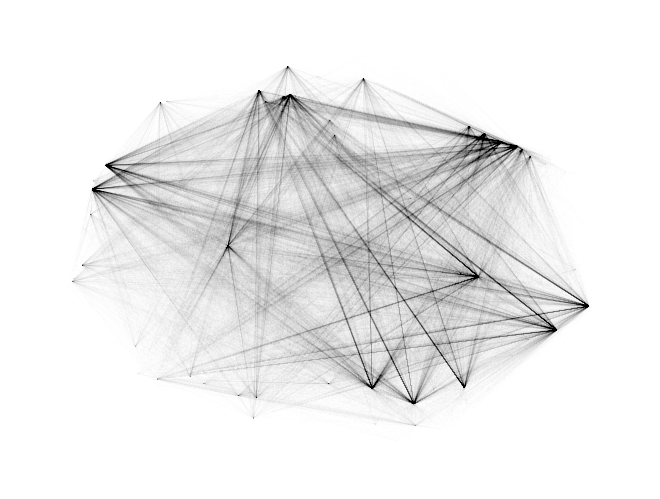

In [15]:
nx.draw(network, with_labels=False, node_size=0, node_color='white', width = edges['LRP']*0.1)

In [16]:
preds = model.predict_networks(ex_data.iloc[61:984,:], descriptors = ex_data_descriptors.iloc[61:984,:], PATH = '.', device_name = torch.device('cuda'))

0


D:\PycharmProjects\scGeneRAI\scGeneRAI.py:228: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_data = pd.concat([result, path])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [35]:
network_data = pd.concat([preds1, preds])

In [36]:
final_network = network_data[['LRP', 'source_gene', 'target_gene']].groupby(['source_gene', 'target_gene']).sum().reset_index()

In [38]:
final_network['LRP'] = final_network['LRP'] / 923
final_network

,source_gene,target_gene,LRP
0,AT1G01120,AT1G01070,0.000124
1,AT1G01370,AT1G01070,0.000135
2,AT1G01370,AT1G01120,0.000161
3,AT1G01390,AT1G01070,0.000112
4,AT1G01390,AT1G01120,0.000065
...,...,...,...
1998995,RBOH F,AT5G67600,0.000161
1998996,RBOH F,FMO GS-OX1,0.000171
1998997,RBOH F,FMO GS-OX3,0.000139
1998998,RBOH F,FMO GS-OX4,0.000141


In [39]:
edges = final_network.sort_values(by='LRP', ascending=False)#.iloc[:200,:]
edges

,source_gene,target_gene,LRP
256416,AT2G34430,AT1G72610,0.004908
256634,AT2G34430,AT2G28900,0.004906
1780157,AT5G54270,AT2G34430,0.004904
410681,AT3G08940,AT2G34430,0.004757
256605,AT2G34430,AT2G25510,0.004651
...,...,...,...
1346475,AT5G14330,AT2G47870,0.000043
186082,AT2G22190,AT1G56710,0.000043
1150223,AT4G36850,AT1G56710,0.000041
1888035,AT5G62280,AT4G21620,0.000041


In [40]:
network = nx.from_pandas_edgelist(edges, source='source_gene', target='target_gene', edge_attr='LRP')

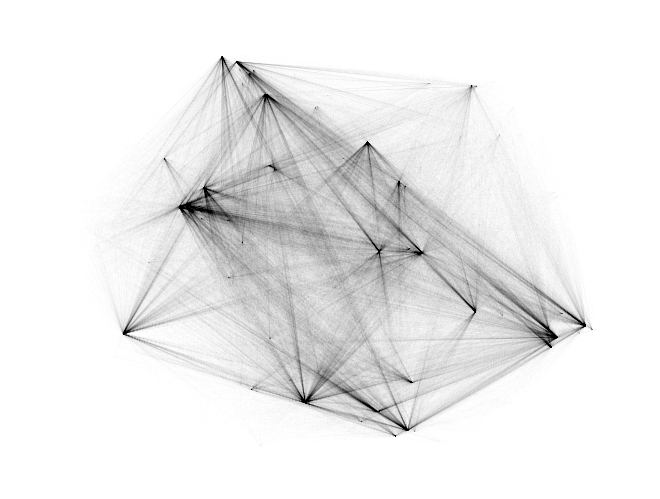

In [41]:
nx.draw(network, with_labels=False, node_size=0, node_color='white', width = edges['LRP']*0.1)

In [49]:
len(ex_data_descriptors.iloc[984:1148,:])

164

In [50]:
preds1 = model.predict_networks(ex_data.iloc[984:1148,:], descriptors = ex_data_descriptors.iloc[984:1148,:], PATH = '.', device_name = torch.device('cuda'))

KeyboardInterrupt: 